In [1]:
# Qian Yi HW2
# homework discussion group member: Jingyu Zhang

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# 1. Feedforward 

### 1.1 draw network 

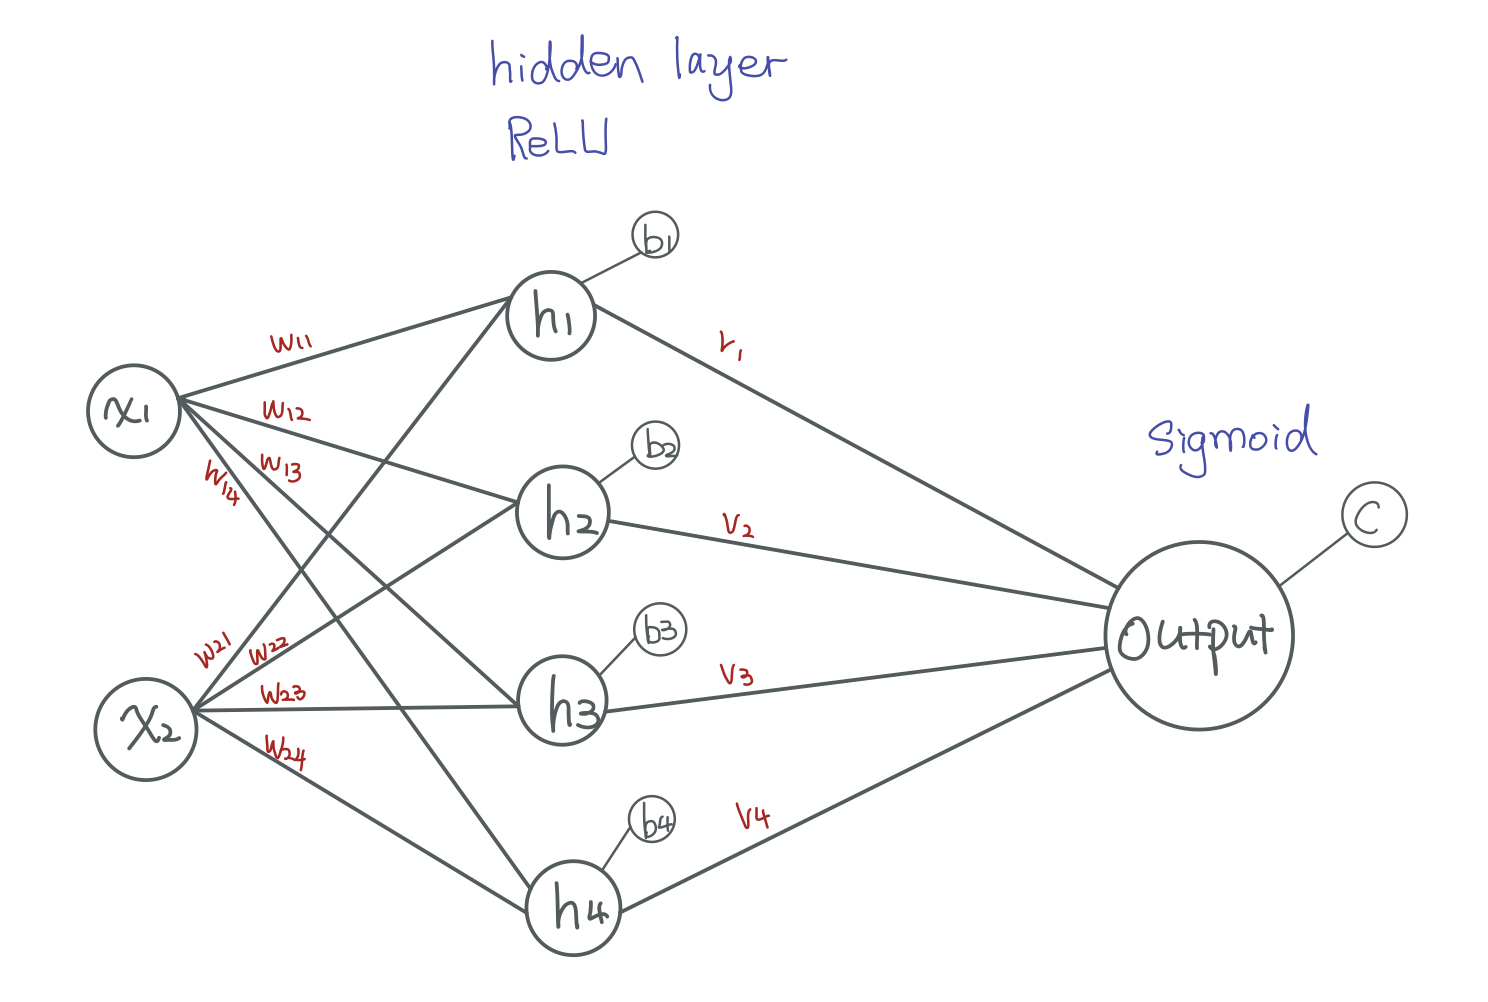

### 1.2 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

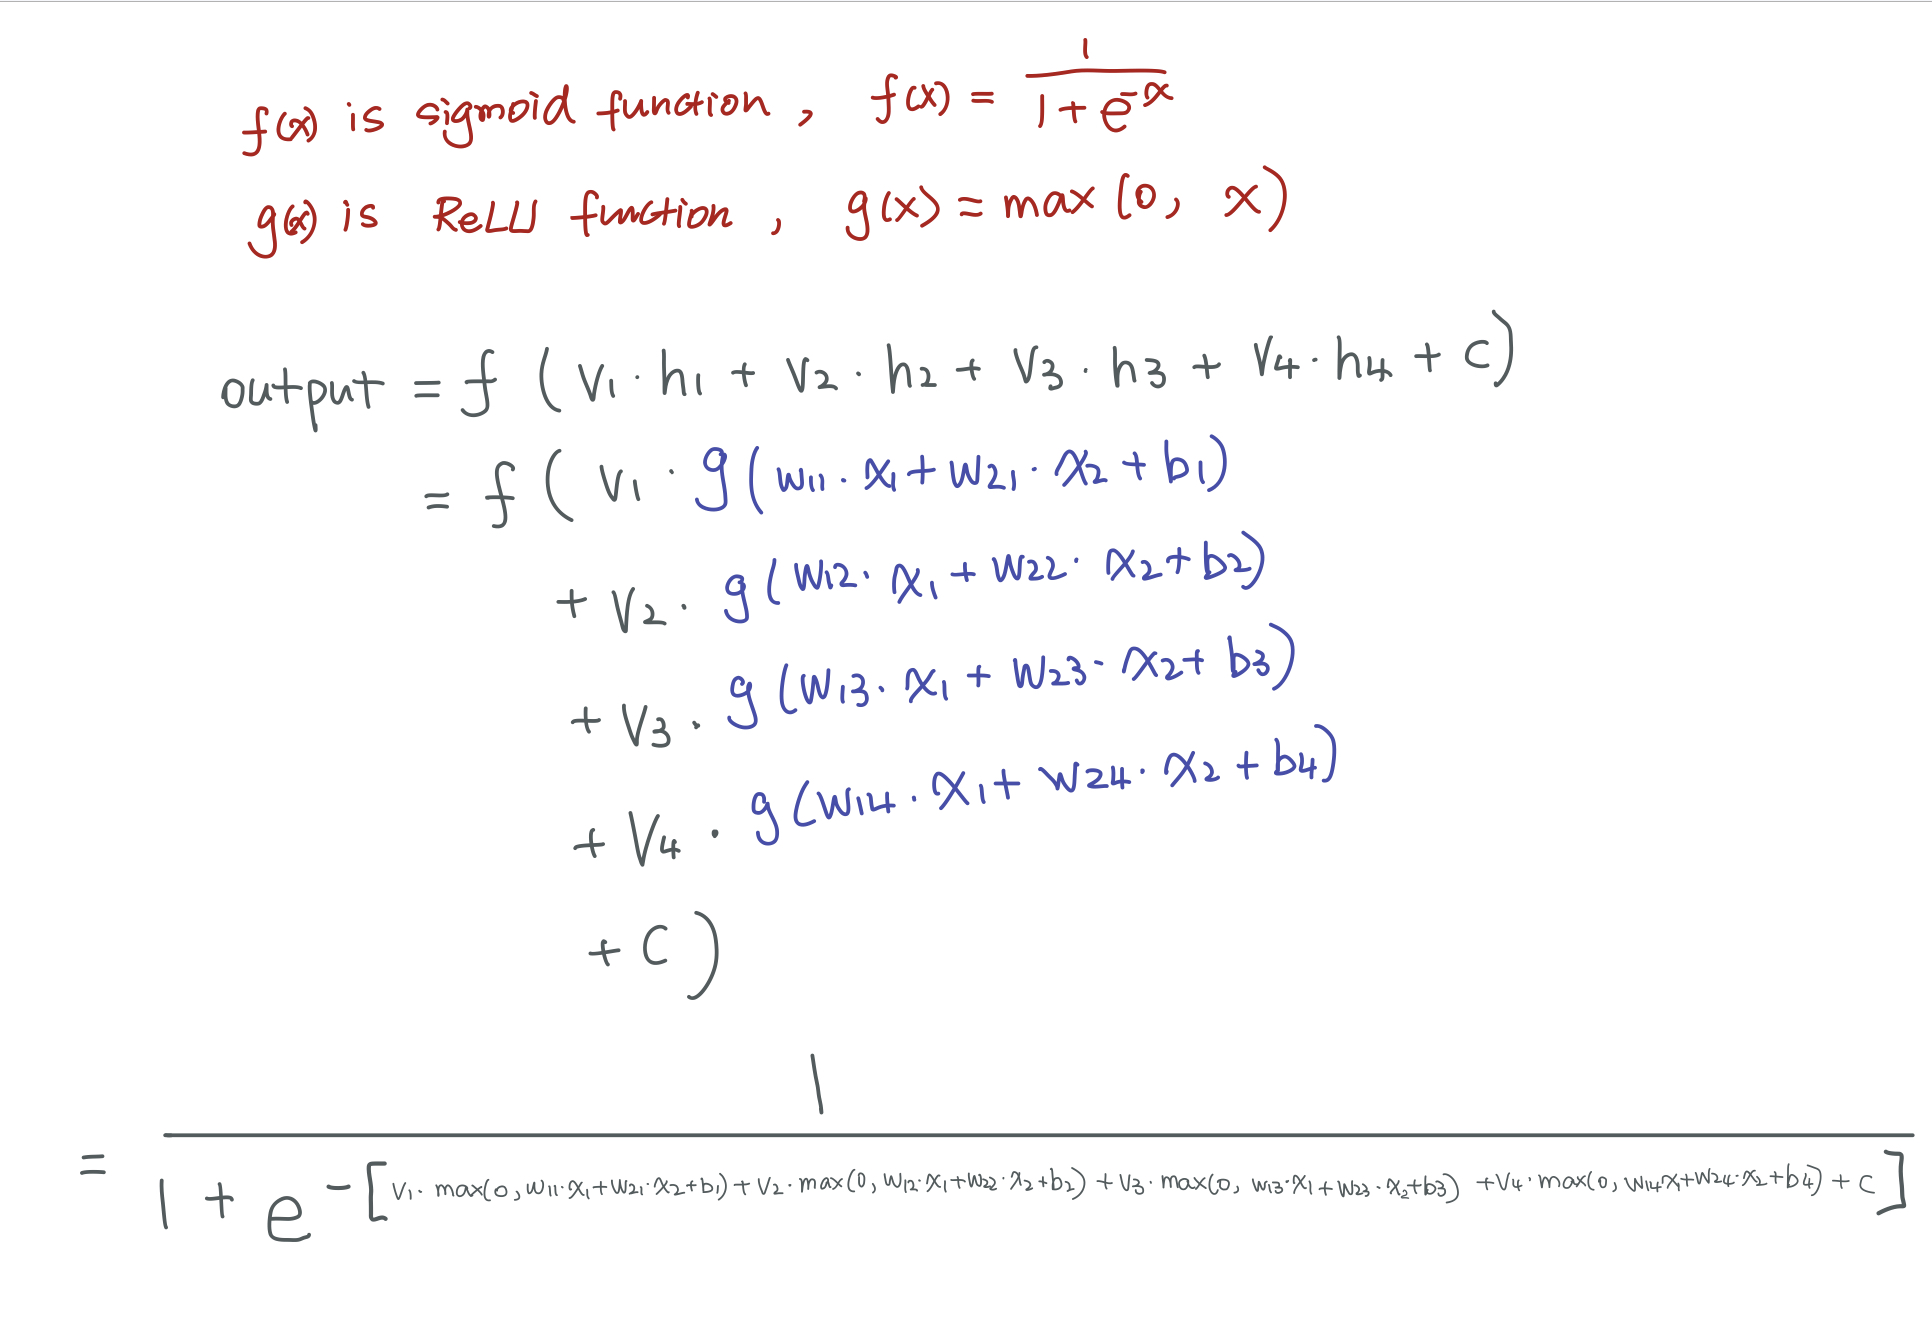

### 1.3 write out forward pass function in python, call it ff_nn_Relu()

In [3]:
# step 1: function for Relu activation 
def relu(z):
    return np.where(z>0, z, 0)

def sigmoid(z):
    return 1/(1+np.exp(-np.array(z)))

In [4]:
# step 2: write function for hidden layer (relu activation) 
def nn_hidden_layer(X, W, b):
    return relu(np.matmul(X,W)+b)

In [5]:
# step 3: write the ff_nn_Relu function (sigmoid output function) 
def ff_nn_Relu(X,W,b,V,c):
    T=nn_hidden_layer(X,W,b)
    P=np.matmul(T,V)
    result=P+c
    return sigmoid(result)

### 1.4 Suppose you have the following set of weight matrices and a few inputs, what are the class probabilities associated with the forward pass of each sample?

In [6]:
# load variables 
W=np.array([[1,-1,0,1],[0,0,0.5,1]])
X=np.array([[1,-1],[0,-1],[0,1]]) 
b=np.array([[0,0,1,0]])
V=np.array([[1],[0],[-1],[1]])
c=np.array([[1.0]])

In [7]:
ff_nn_Relu(X,W,b,V,c) 

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

Comments: The class probabilities are 0.81757448, 0.62245933 and 0.62245933

# 2. Gradient Descent

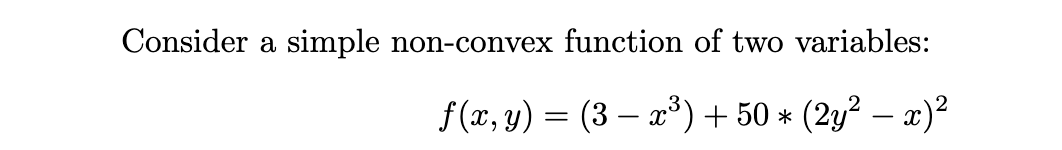

### 2.1 What are the partial derivatives of f with respect to x and to y?

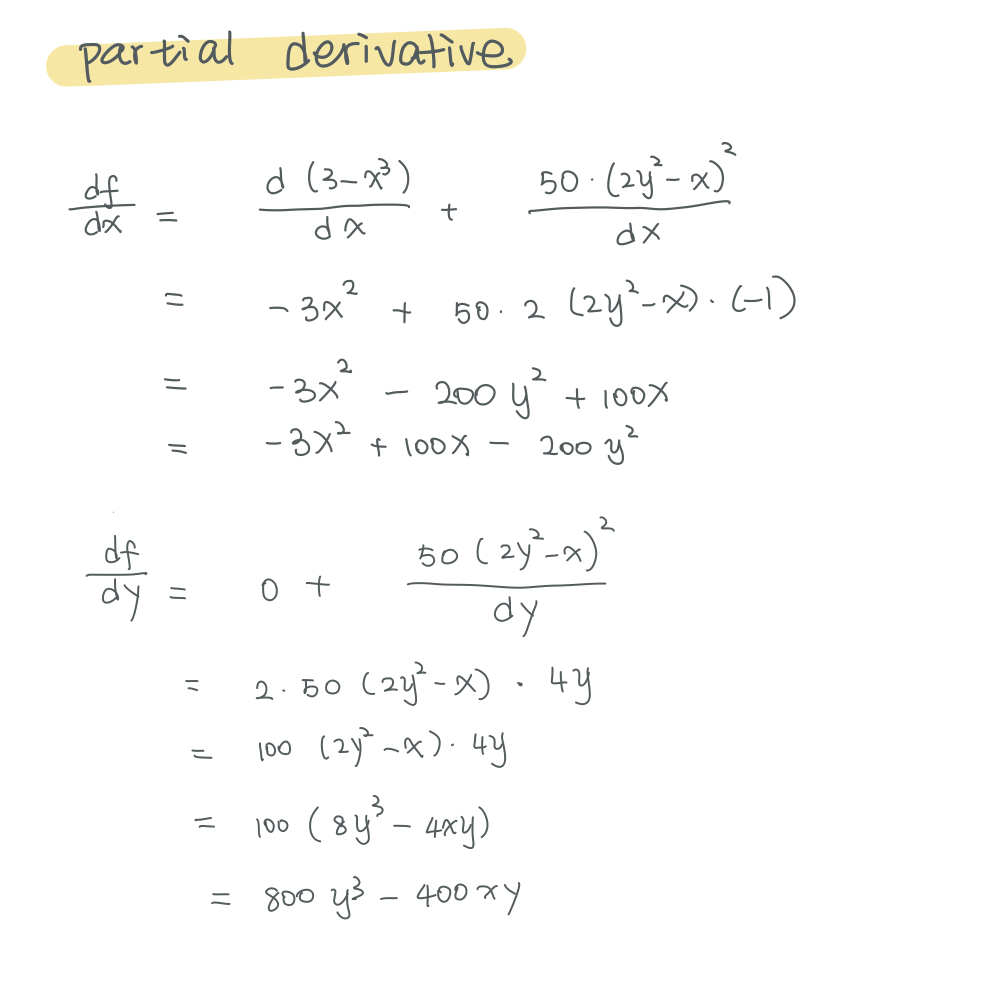

### 2.2 Create a visualization of the contours of this function.

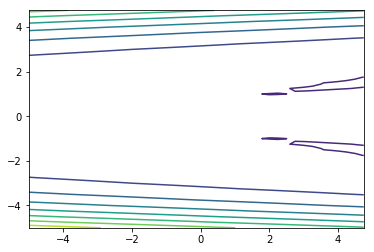

In [8]:
delta=0.25
x=np.arange(-5.0,5.0,delta)
y=np.arange(-5.0,5.0,delta)
X, Y=np.meshgrid(x,y)
Z=(3-X**3)+50*(2*Y**2-X)**2
fig,ax=plt.subplots()
CS=ax.contour(X,Y,Z)

### 2.3 Write a Gradient Descent algorithm for finding the minimum of the function.  Visualize your results with a few different learning rates.

In [9]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * (x**2)+100*x -200*(y**2)
    df_dy = 800*(y**3)-400*x*y
    return np.array([df_dx, df_dy])

In [10]:
def grad_descent(starting_point, iterations, learning_rate):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,-4,size=2)
    trajectory = [point]
        
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

In [11]:
traj = grad_descent(starting_point=None, iterations=10000,learning_rate = 0.00001)
traj # take a look at the trajectory points 

array([[-4.28459009e+00, -4.61480596e+00],
       [-4.23716190e+00, -3.74948447e+00],
       [-4.20426886e+00, -3.26423475e+00],
       ...,
       [-1.60774770e-04, -3.58022363e-07],
       [-1.60613994e-04, -3.58022132e-07],
       [-1.60453379e-04, -3.58021902e-07]])

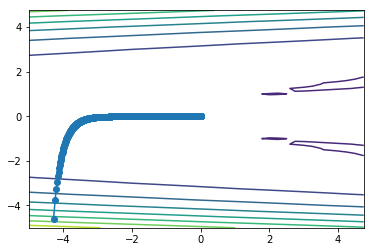

In [12]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### try different learning rate 

In [13]:
traj = grad_descent(starting_point=None, iterations=10000,learning_rate = 0.00005)
traj # take a look at the trajectory points 

array([[-4.45696788e+00, -4.99811912e+00],
       [-4.18189140e+00,  4.41769492e-01],
       [-4.15640711e+00,  4.01372216e-01],
       ...,
       [ 4.04579843e-15,  4.49766555e-08],
       [ 4.04579844e-15,  4.49766555e-08],
       [ 4.04579844e-15,  4.49766555e-08]])

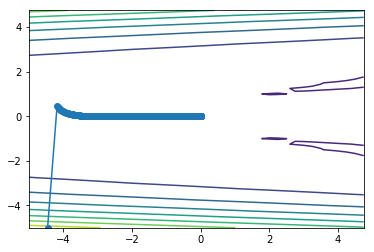

In [14]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [15]:
traj = grad_descent(starting_point=None, iterations=10000,learning_rate = 0.00010)
traj # take a look at the trajectory points 

array([[-4.12866151e+00, -4.34731856e+00],
       [-3.70427757e+00,  2.94348573e+00],
       [-3.48983613e+00,  4.67131889e-01],
       ...,
       [ 4.74838118e-13,  4.87256667e-07],
       [ 4.74838118e-13,  4.87256667e-07],
       [ 4.74838118e-13,  4.87256667e-07]])

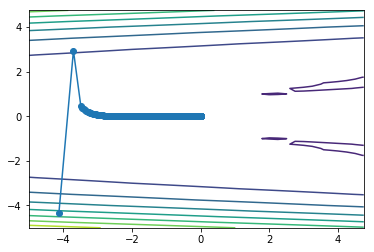

In [16]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

comment：When the learning rate is small, the step size between points are small. As the learning rate increased, the steps became larger and finally started "zigzag steps" when the learning rate too large. 

### 2.4 Write a Gradient Descent With Momentum algorithm for finding the mini-mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [17]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,-4,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

In [19]:
traj = grad_descent_with_momentum(starting_point=None, iterations=10000, epsilon=0.00010, alpha=0.00001)

traj # take a look at the trajectory points 

array([[-4.04407097e+00, -4.38577076e+00],
       [-3.61402421e+00,  3.07250280e+00],
       [-3.38515584e+00,  3.07992073e-01],
       ...,
       [ 4.73402091e-13,  4.86519317e-07],
       [ 4.73402091e-13,  4.86519317e-07],
       [ 4.73402091e-13,  4.86519317e-07]])

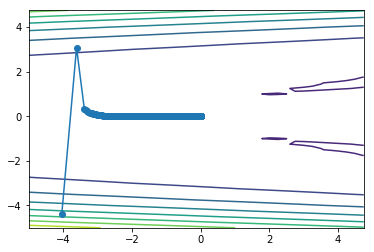

In [20]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### try different hyperparameters

In [21]:
traj = grad_descent_with_momentum(starting_point=None, iterations=10000, epsilon=0.00010, alpha=0.5)
traj # take a look at the trajectory points 

array([[-4.83767218e+00, -4.36440845e+00],
       [-4.40131331e+00,  3.13081617e+00],
       [-3.93726908e+00,  3.87217708e+00],
       ...,
       [ 2.89271171e-08,  1.20264536e-04],
       [ 2.89271171e-08,  1.20264536e-04],
       [ 2.89271171e-08,  1.20264536e-04]])

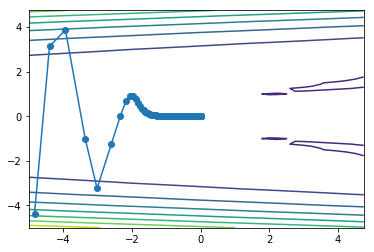

In [22]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [23]:
traj = grad_descent_with_momentum(starting_point=None, iterations=10000, epsilon=0.000004, alpha=0.3)
traj # take a look at the trajectory points 

array([[-4.02674673e+00, -4.19872943e+00],
       [-4.01083799e+00, -3.93481137e+00],
       [-3.99188180e+00, -3.63543561e+00],
       ...,
       [-1.10497210e-02, -8.73199300e-07],
       [-1.10434033e-02, -8.73177240e-07],
       [-1.10370891e-02, -8.73155194e-07]])

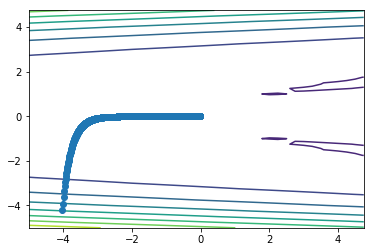

In [24]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

comments: The epsilon value is how large each step is; The alpha value is how quickly to forget about the previous motion. With large learning rate, the momentum will reduce the zigzag sway path. 

# 3. Backprop

### 3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

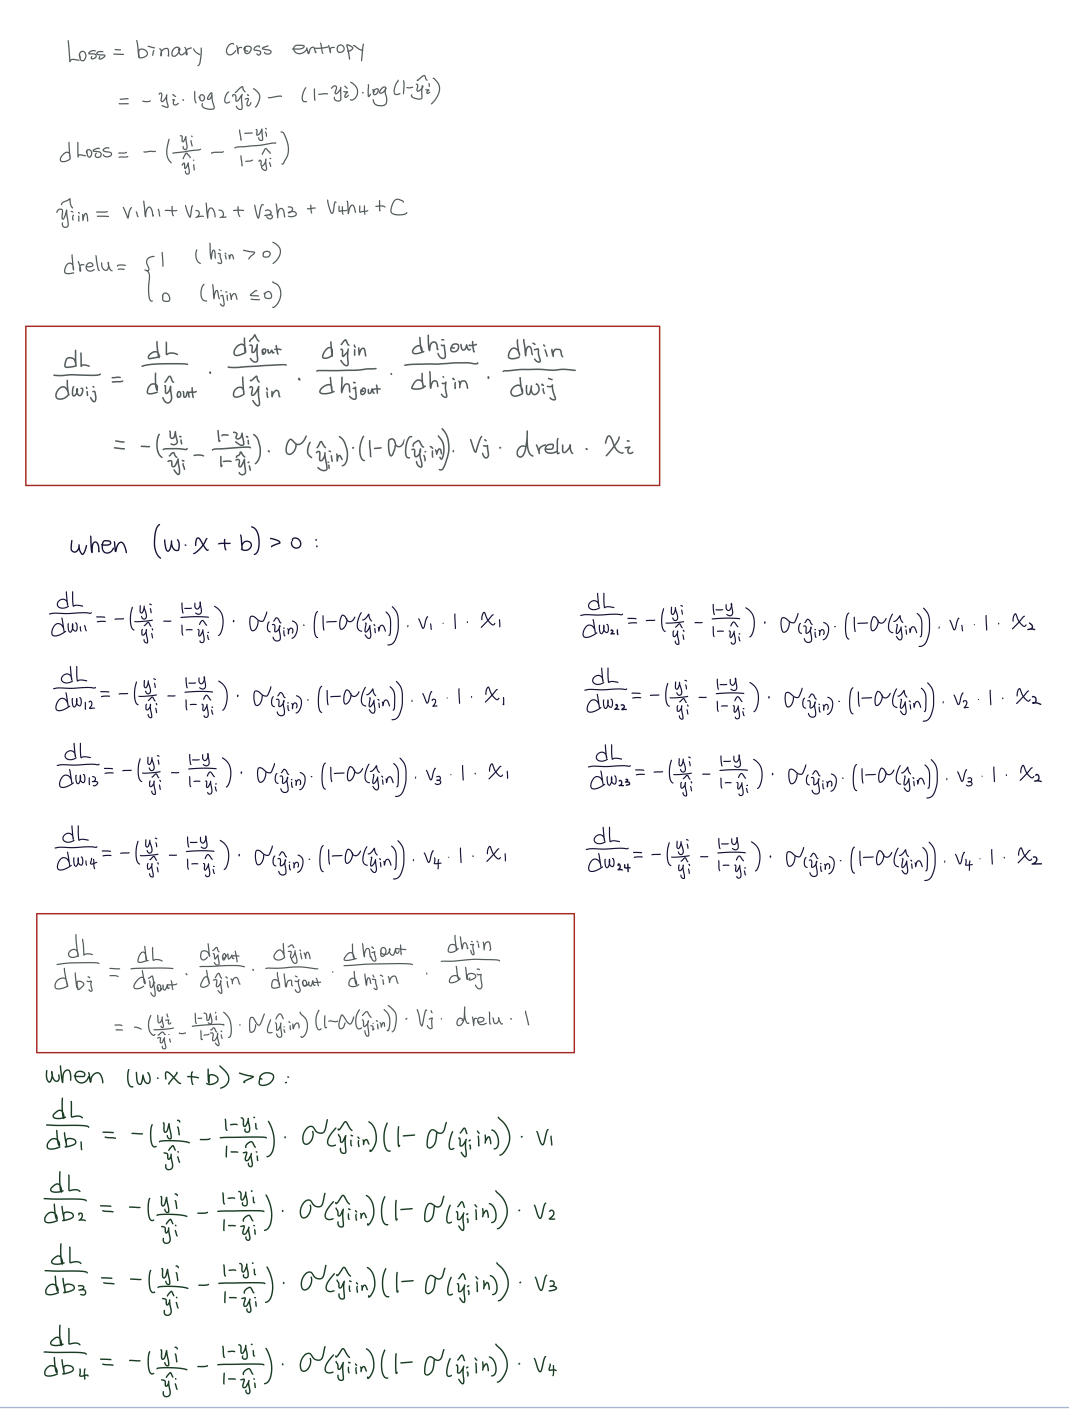
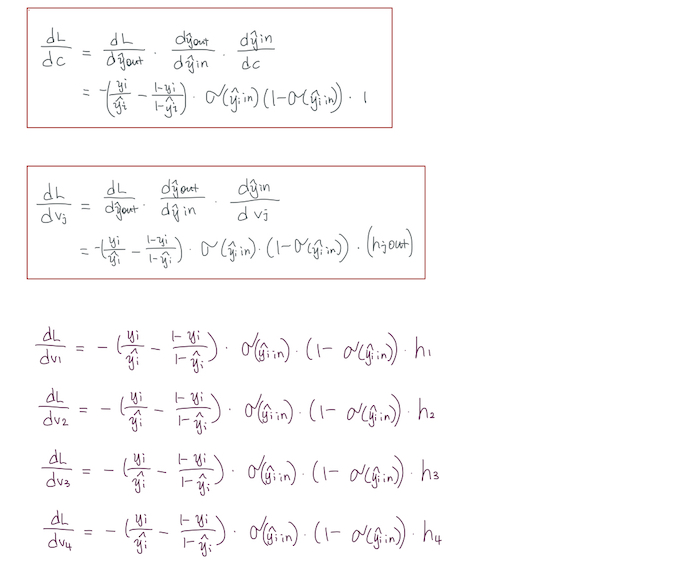

### 3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [25]:
def loss_func(y, yhat): # binary cross entropy and its derivative 
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).sum(),  -(y/yhat - (1-y)/(1-yhat))

def drelu(x):
    return np.where(x>0, 1, 0)

def ff_nn_ReLu(x, model_parameters):
    # unpacking the parameters
    W, V, b, c = model_parameters
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

def grad_f(x, y, model_params):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    Loss, dLoss = loss_func(y, yhat)
    h = relu(np.dot(x,W) + b)
    dc = dLoss * sigmoid(np.dot(h, V) + c) * (1 - sigmoid(np.dot(h,V) + c))
    dV = np.dot(dc.T, h).T
    db = np.where(np.dot(x,W) + b>0, 1, 0) * np.dot(dLoss, V.T)
    dW = np.dot(x.T, db)
    return Loss, np.average(dc, axis=0), dV, np.average(db, axis=0), dW

In [26]:
np.random.seed(100)
W = np.random.randn(8).reshape(2,4)
V = np.random.randn(4).reshape(4,1)
b = np.random.randn(4).reshape(1,4)
c = np.random.randn(1)

X = np.random.randn(1000).reshape((500,2))
Y = np.random.randn(500).reshape((500,1))

grad_f(X, Y, (W, V, b, c))

(237.7552937231631, array([0.29915131]), array([[ 87.4709765 ],
        [112.36467653],
        [ 92.73632242],
        [ 79.43124234]]), array([-0.1141512 ,  0.29552065, -0.43825787,  0.33018213]), array([[  44.0614675 ,  -24.6421025 ,  -29.96588119,  -64.19592612],
        [ -31.38454294,   33.53934819,  -28.290493  , -139.14059587]]))

### 3.3 Generate a synthetic dataset like the XOR pattern (see below)

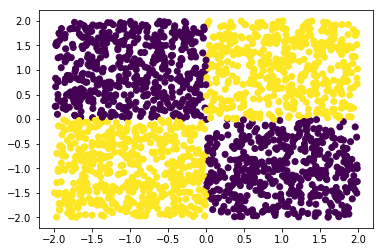

In [27]:
size = 2000
np.random.seed(374)
x = np.random.uniform(low=-2,high=2,size=2 * size).reshape((size,2))
# initializing Y's with 0
y = np.zeros(size)
y = np.where(x[:, 0] * x[:, 1] >0 , 1, 0)
plt.scatter(x[:, 0], x[:, 1], c=y)

### 3.4 Fit your network using Gradient Descent. Keep track of the total Loss ateach iteration and plot the result.

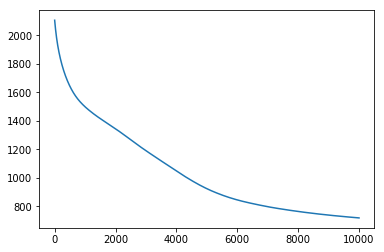

In [28]:
def grad_descent(x, y, model_params, iters, learning_rate):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x, y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        params = params - grads * learning_rate
        model_params = params
    return losses, model_params


W = np.random.uniform(size=8).reshape(2,4)
V = np.random.uniform(size=4).reshape(4,1)
b = np.random.uniform(size=4).reshape(1,4)
c = np.random.uniform(size=1).reshape(1,1)
    
Y = np.where(y, 1, 0).reshape(size,1)

loss, model_params = grad_descent(x, Y, model_params=(W, V, b, c), iters=10000, learning_rate= 0.000001)
plt.plot(loss,'-')

### 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

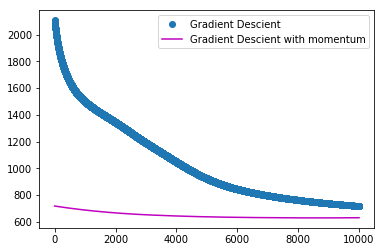

In [29]:
def gradient_descent_momentum(x,y, model_params,iters,learning_rate, alpha):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W,V,b,c])
    Velocity = np.array([np.zeros(W.shape), np.zeros(V.shape), np.zeros(b.shape), np.zeros(c.shape)])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x,y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        Velocity = alpha * Velocity + learning_rate * grads
        params = params - Velocity
        model_params = params
    return losses, params

Y = np.where(y, 1, 0).reshape(size,1)
model_params = (W, V, b, c)

loss, model_params = grad_descent(x, Y, model_params, iters=10000, learning_rate= 0.000001)
loss_mom, model_params_mom = gradient_descent_momentum(x, Y, model_params, iters=10000, learning_rate= 0.000001, alpha = 0.5)
plt.plot(loss,'o', label = 'Gradient Descient')
plt.plot(loss_mom, 'm', label = 'Gradient Descient with momentum')
plt.legend(loc = "upper right")

Comment: The Gradient Descient with momentum is more efficient. With the same itation and learning rate, the momentum algorithm yielded lower Loss. 

### 3.6 Plot  a  visualization  of  the  final  decision  boundary  that  your  model  has learned.  Overlay the datapoints in this plot

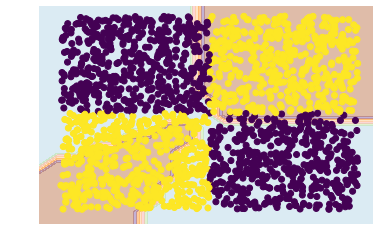

In [30]:
def plot_decision_boundaries(X, Y, model_params):
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() +0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    h = 0.25  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xs = np.c_[xx.ravel(), yy.ravel()]
    Z = ff_nn_ReLu(xs, model_params)
    Z = np.where(Z >= 0.5, 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired,alpha=0.4)
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=Y)

plot_decision_boundaries(x, y, model_params_mom)

comment: Although the current the boundaries didn't show perfect match of the points. As we increase the number of points, reduce the learning rate and increase the number of iteration, the boundaries will show better results. 